# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
scc_data = pd.merge( study_results, mouse_metadata, how="left",on="Mouse ID")

# Display the data table for preview
scc_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(scc_data.value_counts("Mouse ID"))
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Deduplicating methodology found for using .duplicated() via google search, finding the following: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
# Experimenting produced the following... 

dup_mice = scc_data[scc_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
scc_data[scc_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_scc = scc_data[scc_data["Mouse ID"] != "g989"]
clean_scc.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_scc.value_counts("Mouse ID"))
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumordata_df = clean_scc.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_df = tumordata_df.mean()
median_df = tumordata_df.median()
var_df = tumordata_df.var()
std_df = tumordata_df.std()
sem_df = tumordata_df.sem()

tumorsummary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_df,
    'Median Tumor Volume': median_df,
    'Tumor Volume Variance': var_df,
    'Tumor Volume Std. Dev.': std_df,
    'Tumor Volume SEM': sem_df
})

tumorsummary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Info sourced from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html on use of .agg()
# Hot damn that's handy
tumorsummary_df_agg = clean_scc.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumorsummary_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

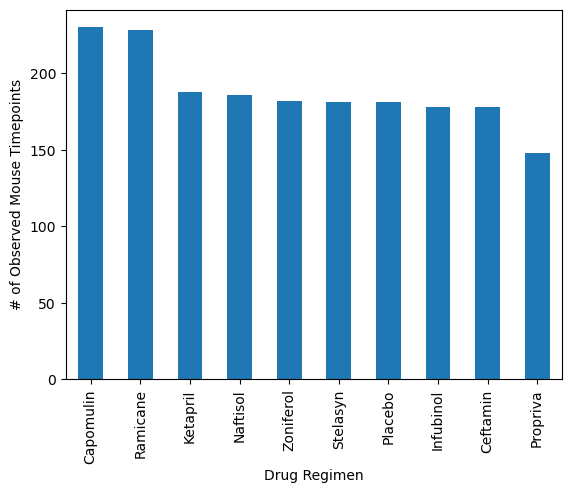

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_pandas_bar = clean_scc["Drug Regimen"].value_counts()

drug_pandas_bar.plot(kind="bar", xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")

plt.show()


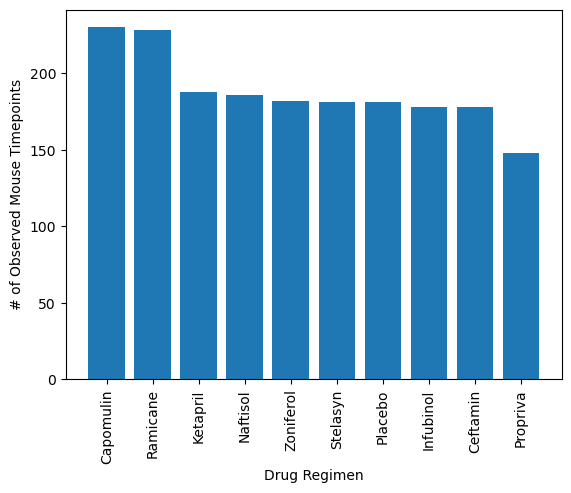

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_pyplot_bar = clean_scc["Drug Regimen"].value_counts()
plt.bar(drug_pyplot_bar.index, drug_pyplot_bar)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

# Show the plot
plt.show()

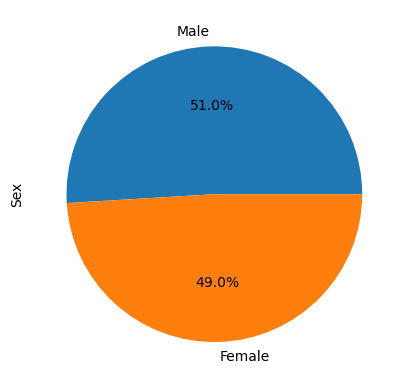

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pandas_pie = clean_scc["Sex"].value_counts()
sex_pandas_pie.plot(kind='pie', autopct='%1.1f%%')

plt.show()

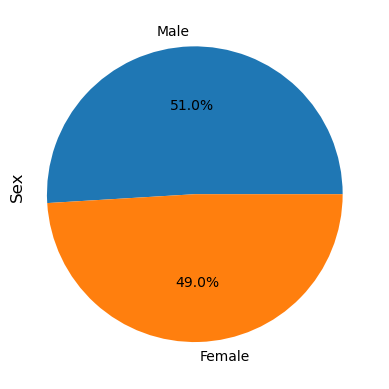

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pyplot_pie = clean_scc["Sex"].value_counts()
plt.pie(sex_pyplot_pie, labels=sex_pyplot_pie.index, autopct='%1.1f%%')
plt.title("Sex", loc='left', y = 0.5, rotation=90, verticalalignment='center')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = clean_scc.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(final_timepoint, clean_scc, on=["Mouse ID", "Timepoint"], how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
target_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in target_drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]

    # add subset    
    tumor_volume.append(tumor_data)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]

    print(f"{regimen}'s potential outliers:", outliers)



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


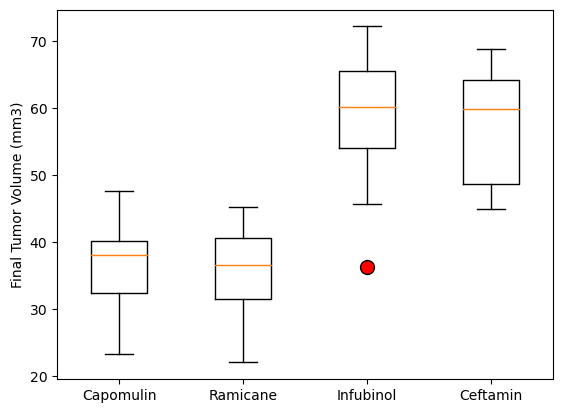

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels=target_drugs, flierprops=dict(markerfacecolor='red', marker='o', markersize=10))
plt.ylabel("Final Tumor Volume (mm3)") 
plt.show()

## Line and Scatter Plots

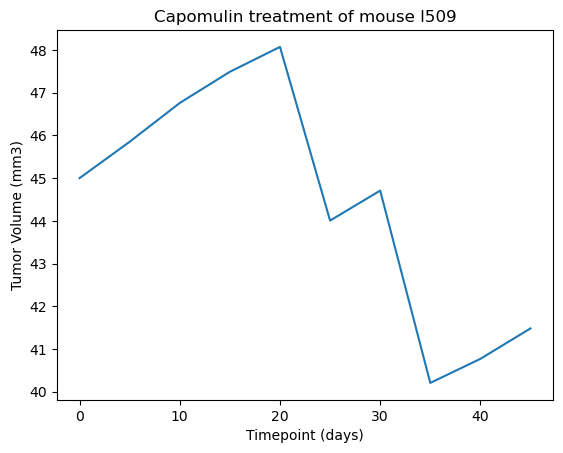

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
specimen = "l509"
drug = "Capomulin"
specimen_drug = clean_scc[(clean_scc["Drug Regimen"] == drug) & (clean_scc["Mouse ID"] == specimen)]

# Generate the line plot
plt.plot(specimen_drug["Timepoint"], specimen_drug["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title( str(drug) + " treatment of mouse " + str(specimen))
plt.show()

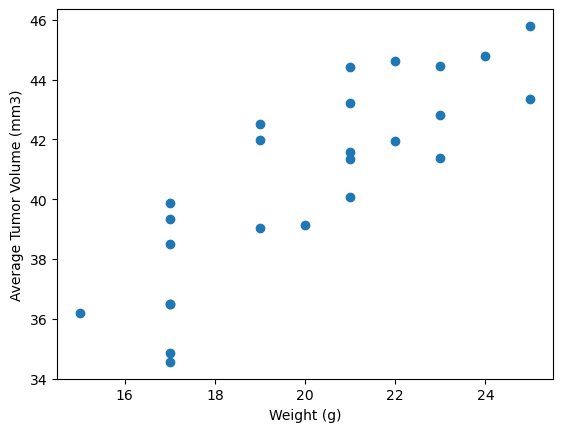

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = "Capomulin"
drug_records = clean_scc[(clean_scc["Drug Regimen"] == drug)]
average_tumor_volume = drug_records.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = drug_records.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

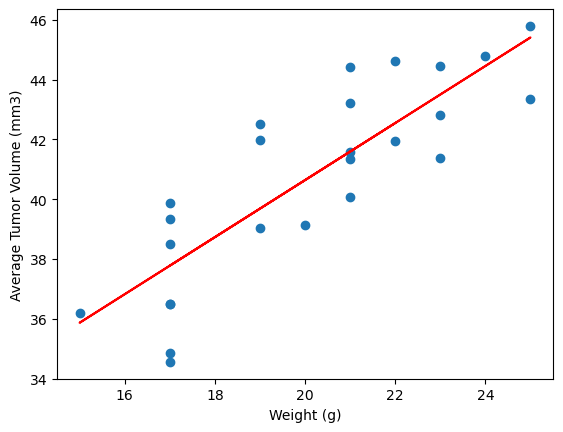

The correlation between mouse weight and the average tumor volume is 0.84


In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

drug = "Capomulin"
drug_records = clean_scc[(clean_scc["Drug Regimen"] == drug)]
average_tumor_volume = drug_records.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = drug_records.groupby("Mouse ID")["Weight (g)"].mean()


correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)#[0]
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.plot(drug_records["Weight (g)"], intercept + slope * drug_records["Weight (g)"], color="r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {r_value:.2f}")
